In [20]:
#pytorch related imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split,Dataset

In [21]:
#other imports
import pandas as pd
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [23]:
dataSetPath = '../Datasets/Dataset1/Respiratory_Sound_Database/Respiratory_Sound_Database'

In [58]:
patient_data=pd.read_csv(dataSetPath+ "/patient_diagnosis.csv",names=['pid','disease'])
patient_data.head()



,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


COPD


e:\conda\envs\pyt\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'Healthy'),
  Text(2, 0, 'Asthma'),
  Text(3, 0, 'COPD'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

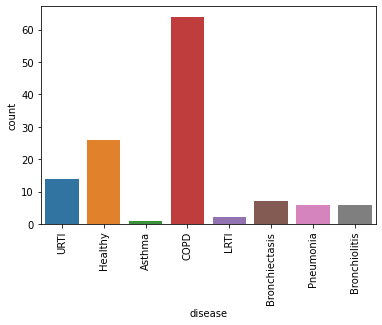

In [25]:
sns.countplot(patient_data.disease)
plt.xticks(rotation=90)

In [87]:
class LungSoundDataSet(Dataset):
    def __init__(self,patient_data_labels, data_file_path):
        self.patient_data_labels = patient_data_labels
        self.data_file_path = data_file_path
        self.audioFiles =[]
        for file in os.listdir(data_file_path):
            if file.endswith('.wav'):
                self.audioFiles.append (file)

    def __getitem__(self, index):
        # get correct label
        pid = int(self.audioFiles[index].split('_')[0])             #get pid from file name
        labelPd = patient_data[patient_data['pid'] == pid]          #find correct row
        label = labelPd.iat[0,1]                                    #extract label

        return self.audioFiles[index],label

   
        
    def __len__(self):
        return len(self.audioFiles)

In [88]:
train_set = LungSoundDataSet(patient_data,dataSetPath + '/audio_and_txt_files')

In [95]:
print(len(train_set))
train_set.__getitem__(0)

920


('101_1b1_Al_sc_Meditron.wav', 'URTI')